In [1]:
%matplotlib inline

import random 
import nbconvert
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd 
from operator import itemgetter
from matplotlib.pyplot import figure
from scipy import stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score



In [2]:
vocabFile = pd.read_csv("science2k-vocab.txt",header=None)
titleFile = pd.read_csv("science2k-titles.txt",header =None)
docwordFile = np.load("science2k-doc-word.npy")

In [3]:
# defining the class K_Means with k value to be specified, tolerance and max iterations
class K_Means:
    def __init__(self, k, tolerance = 0.00001, max_iterations = 20000):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i+100]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            self.label = {}
            self.loss = {}
            for i in range(self.k):
                self.classes[i] = []            
            
            #find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)   

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True
            
            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
                    
            #self.loss = loss
            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                i=0
                for features in data:
                    distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                    self.loss[i] = min(distances)
                    self.label[i] = distances.index(min(distances))
                    i=i+1
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    

In [21]:
# part A : going for K=1:100 with a step of 2

from sklearn import cluster 

Ks = range(1,3,2)
lossVal =[] 


for kval in Ks:
    km = K_Means(k = kval)
    km.fit(docwordFile)
    
    loss=[]
    for i in range(len(km.label)):
        loss.append(km.loss[i])
    lossVal.append(np.sum(loss))
    

112.23112001616532


Text(0, 0.5, 'Objective function value')

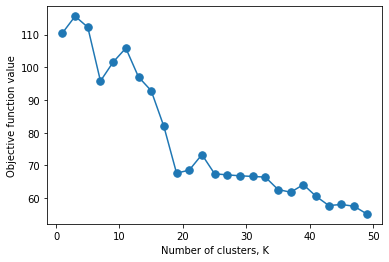

In [25]:
#plotting the mean loss for all K's

plt.plot(Ks, lossVal, '.-', markersize=15)
plt.xlabel('Number of clusters, K')
plt.ylabel('Objective function value')

In [4]:
# choosing K=10 because the step loss is very high, creating an elbow at that value

Ks = 10

km = K_Means(k = Ks)
km.fit(docwordFile)
    

In [5]:
#counting number of elements under each cluster  for 10 clusters

labelVector = []
cluster_centroid = np.zeros((len(km.centroids.keys()),len(km.centroids[0])))
for i in range(len(km.label)):
        labelVector.append(km.label[i])
        

for i in range(0,Ks):
    print(labelVector.count(i))
    #cluster_centroid[i,:] = km.centroids[i]
    #print(cluster_centroid[i,:])
    



127
6
4
1
666
85
41
423
19
1


In [202]:
##report the words associated with the top components in (mi − x)

avg_acrossDocs = np.mean(docwordFile, axis=0)

for i in range(0,Ks):
    idx_cluster = np.where(np.asarray(labelVector)==i)
    distMatrix = np.mean(docwordFile[idx_cluster], axis=0)-avg_acrossDocs

    sortedIndex = np.argsort(distMatrix)
    wordsCluster = sortedIndex[-10:]

    print("Words associated with cluster ", i , "are :") 
    print(vocabFile[0][wordsCluster])

Words associated with cluster  0 are :
81         table
14           dna
221       strain
534        blood
44      sequence
216    frequency
336      strains
17          gene
205      genetic
322    infection
Name: 0, dtype: object
Words associated with cluster  1 are :
1046            say
241            last
876             get
34            years
436          people
76             year
269            just
228      scientists
185     researchers
49             says
Name: 0, dtype: object
Words associated with cluster  2 are :
599           impact
1081      introduced
318            plant
1258      extinction
2461         impacts
2038    introduction
2879         ecology
811        diversity
1504      ecological
1883      ecosystems
Name: 0, dtype: object
Words associated with cluster  3 are :
152          average
429    significantly
102            lower
81             table
219      significant
164           period
101             mean
96            values
64           reports
0     

In [188]:
# findgin reports closest to cluster centers


for i in range(0,Ks):
    idx_cluster = np.where(np.asarray(labelVector)==i)
    distMatrix = docwordFile[idx_cluster]-km.centroids[i]
    distMatrix = np.sum(np.square(distMatrix), axis=1)
    distMatrix = np.sqrt(distMatrix)
    
    sortedIndex = np.argsort(distMatrix)
    wordsCluster = sortedIndex[:10]

    print("Reports associated with cluster ", i , "are :") 
    print(titleFile[0][wordsCluster])

Reports associated with cluster  0 are :
43    Cenozoic Deep-Sea Temperatures and Global Ice ...
57    Clonal Propagation of Primate Offspring by Emb...
49    Direct Observation of Dynamical Heterogeneitie...
24    The Changing Morphology and Increasing Deceler...
33        Designer Labs: Architecture Discovers Science
42    Deconstructing the Science Wars by Reconstruct...
4     Corrections and Clarifications: Commercializat...
52    Regulation of Abscisic Acid-Induced Stomatal C...
8           Tracing the Origins of Salmonella Outbreaks
27       Modulation of Brain Reward Circuitry by Leptin
Name: 0, dtype: object
Reports associated with cluster  1 are :
105    Quantum-Critical Conductivity Scaling for a Me...
152                                Signals to Move Cells
41                     Memory-A Century of Consolidation
170    Evidence for DNA Loss as a Determinant of Geno...
143    A Subclass of Ras Proteins That Regulate the D...
79     One Polypeptide with Two Aminoacyl-tRNA Syn

In [203]:
# part 2

wordDocFile = np.load("science2k-word-doc.npy")


(5476, 1373)


In [205]:
Ks = range(1,50,2)
loss =[] 
lossVal =[]

for kval in Ks:
    km = K_Means(k = kval)
    km.fit(wordDocFile)
    
    loss=[]
    for i in range(len(km.label)):
        loss.append(km.loss[i])
    lossVal.append(np.mean(loss))




Text(0, 0.5, 'Objective function value')

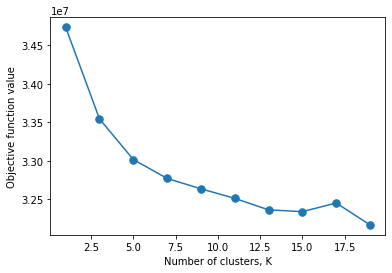

In [206]:
plt.plot(Ks, lossVal, '.-', markersize=15)
plt.xlabel('Number of clusters, K')
plt.ylabel('Objective function value')

In [207]:
k=5
model = cluster.KMeans(n_clusters = k)
model.fit(wordDocFile)



KMeans(n_clusters=5)

In [208]:
# choosing K=7 because the step loss is very high, creating an elbow at that value

Ks = 7

km = K_Means(k = Ks)
km.fit(wordDocFile)



227
1031
377
3269
572


In [210]:
#counting number of elements under each cluster  for 10 clusters

labelVector = []
cluster_centroid = np.zeros((len(km.centroids.keys()),len(km.centroids[0])))
for i in range(len(km.label)):
        labelVector.append(km.label[i])
        

for i in range(0,Ks):
    print(labelVector.count(i))
    #cluster_centroid[i,:] = km.centroids[i]
    #print(cluster_centroid[i,:])



Words associated with cluster  0 are :
717     Three-Dimensional Structure of the Tn5 Synapti...
1222                 Sediments at the Top of Earth's Core
986     Climate Extremes: Observations, Modeling, and ...
837     The Complete Atomic Structure of the Large Rib...
1301    Subduction and Slab Detachment in the Mediterr...
1078                          Blue-Fluorescent Antibodies
436     Advances in the Physics of High-Temperature Su...
266     Internal Structure and Early Thermal Evolution...
216     The Atom-Cavity Microscope: Single Atoms Bound...
988            NEAR at Eros: Imaging and Spectral Results
Name: 0, dtype: object
Words associated with cluster  1 are :
435            Orbital Physics in Transition-Metal Oxides
17      The Baryon Halo of the Milky Way: A Fossil Rec...
634                        Earth's Core and the Geodynamo
437     Quantum Criticality: Competing Ground States i...
15      The Formation and Early Evolution of the Milky...
1303                      Sed

In [213]:
avg_acrossDocs = np.mean(wordDocFile, axis=0)

for i in range(0,Ks):
    idx_cluster = np.where(np.asarray(labelVector)==i)
    distMatrix = np.mean(wordDocFile[idx_cluster], axis=0)-avg_acrossDocs

    sortedIndex = np.argsort(distMatrix)
    wordsCluster = sortedIndex[-10:]

    print("Words associated with cluster ", i , "are :") 
    print(titleFile[0][wordsCluster])

Reports associated with cluster  0 are :
224    mechanism
214         core
4            end
221       strain
226        layer
223    evolution
188       carbon
220         case
212         life
225      natural
Name: 0, dtype: object
Reports associated with cluster  1 are :
1          cells
1005       today
907      devices
1030    families
953     separate
970         sets
897      exposed
896         flux
994        flies
1013         gap
Name: 0, dtype: object
Reports associated with cluster  2 are :
372         atoms
376      distance
360      negative
375         occur
374    relatively
334     transport
361       support
319        images
358     addressed
373      approach
Name: 0, dtype: object
Reports associated with cluster  3 are :
3060    locomotion
3078     tolerance
2811       chicago
3110    immunology
3120         spins
3251       letters
2391        street
2791           bud
3247     cytosolic
2496         joint
Name: 0, dtype: object
Reports associated with cluster  4

In [ ]:
# findgin words closest to cluster centers

for i in range(0,Ks):
    idx_cluster = np.where(np.asarray(labelVector)==i)
    distMatrix = wordDocFile[idx_cluster]-km.centroids[i]
    distMatrix = np.sum(np.square(distMatrix), axis=1)
    distMatrix = np.sqrt(distMatrix)
    #print(distMatrix.shape)
    sortedIndex = np.argsort(distMatrix)
    wordsCluster = sortedIndex[:10]

    print("Reports associated with cluster ", i , "are :") 
    print(vocabFile[0][wordsCluster])